In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
norm = tfp.distributions.MultivariateNormalFullCovariance

In [0]:
X1 = np.random.randn(1000,2)@np.array([[0.5,1],[1,0.5]])+np.array([[3,3]])
X2 = np.random.randn(1000,2)@np.array([[0.5,0.125],[0.125,1]])+np.array([[-1,-1]])
X3 = np.random.randn(1000,2)@np.array([[0.25,0],[0,0.25]])+np.array([[0,3]])
Data = np.vstack((X1,X2,X3))

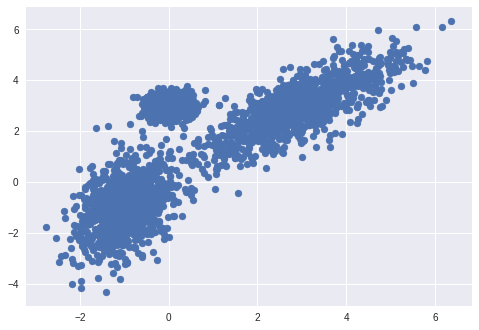

In [0]:
plt.scatter(Data[:,0],Data[:,1])

In [0]:

X = tf.placeholder(dtype=tf.float64,shape=(None,2))

mu0 = tf.Variable(np.random.permutation(Data)[0])
mu1 = tf.Variable(np.random.permutation(Data)[0])
mu2 = tf.Variable(np.random.permutation(Data)[0])

M0 = tf.Variable(np.eye(2).astype(np.float64))
sig0 = tf.matmul(tf.transpose(M0),M0)
M1 = tf.Variable(np.eye(2).astype(np.float64))
sig1 = tf.matmul(tf.transpose(M1),M1)
M2 = tf.Variable(np.eye(2).astype(np.float64))
sig2 = tf.matmul(tf.transpose(M2),M2)
pi = tf.Variable(np.array([[1.],[1.],[1.]])/3)

w = pi/(tf.reduce_sum(pi))

G0 = norm(loc=mu0,covariance_matrix=sig0)
G1 = norm(loc=mu1,covariance_matrix=sig1)
G2 = norm(loc=mu2,covariance_matrix=sig2)

P = tf.concat([tf.expand_dims(G0.prob(X),1),tf.expand_dims(G1.prob(X),1),tf.expand_dims(G2.prob(X),1)],axis=1)
P.shape
finalP = tf.matmul(P,w)

loss = -tf.reduce_sum(tf.log(finalP))



Instructions for updating:
Colocations handled automatically by placer.


In [0]:
Operation = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

Losses = []
Probs = []
finalProbs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        finalProbValue,ProbValue,lossValue, _ = sess.run((finalP,P,loss,Operation),feed_dict={X:Data})
        Losses.append(lossValue)
        if (Losses[-1] <=0):
            break
        Probs.append(ProbValue)
        finalProbs.append(finalProbValue)
    weights = sess.run(w)
    mean0 = sess.run(mu0)
    mean1 = sess.run(mu1)
    mean2 = sess.run(mu2)
    cov0 = sess.run(sig0)
    cov1 = sess.run(sig1)
    cov2 = sess.run(sig2)
    


Instructions for updating:
Use tf.cast instead.


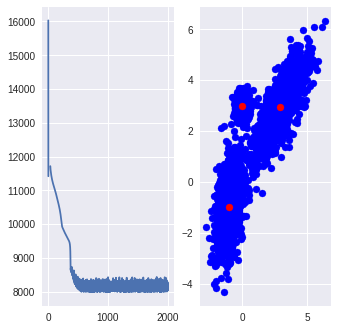

In [0]:
plt.figure()
plt.subplot(1,3,1)
plt.plot(Losses)
plt.subplot(1,3,2)
plt.scatter(Data[:,0],Data[:,1],c='b')
plt.scatter(mean0[0],mean0[1],c='r')
plt.scatter(mean1[0],mean1[1],c='r')
plt.scatter(mean2[0],mean2[1],c='r')

In [0]:
weights

array([[0.33204819],
       [0.33443426],
       [0.33351755]])

In [0]:
np.sum(weights)

1.0